In [96]:
import numpy as np
pic=np.load('pic228.npy')
weight1=np.load('weight1.npy')
weight2=np.load('weight2.npy')
pic3=pic[:,:,0:3]

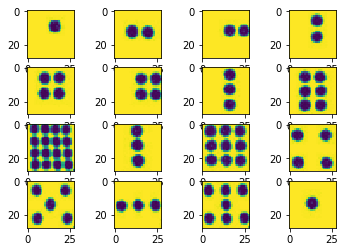

In [122]:
import matplotlib.pyplot as plt
for i in range (0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(pic[:,:,i])
    

In [11]:
np.random.randint(weight1.shape[4], size=2)
# import random
# random.randint((2),0,weight1.shape[4])

array([0, 1])

In [24]:
weight2.shape

(5, 5, 3, 6, 2)

In [44]:
from scipy.signal import convolve2d
s=convolve2d(pic3[:,:,0],weight1[:,:,0,0,0].reshape(5,5),'valid')
with tf.Session() as sess:
    w=maxpool2d(s.reshape(1,24,24,1),k=2).eval()

In [49]:
p=np.zeros((3,784))
for i in range(0,3):
    p[i,:]=pic3[:,:,i].reshape(784,)

In [60]:
with tf.Session() as sess:
    p=tf.reshape(p, shape=[-1, 28, 28, 1])
    I=conv2d(p, weight1[:,:,:,:,0].reshape(5,5,1,3))
    I=maxpool2d(I,k=2)
    I1 = conv2d(I, weight2[:,:,:,:,0].reshape(5,5,3,6))
    # Max Pooling (down-sampling)
    I1 = maxpool2d(I1, k=2)
    I1=tf.reshape(I1,[-1,294]).eval()

In [61]:
I1.shape

(3, 294)

In [46]:
def conv2d(x, W, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    #x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')


In [32]:
# from scipy.signal import convolve2d
# def connect(pic3,weight1,weight2,n):
#     w1=weight1[:,:,:,:,np.random.randint(weight1.shape[4], size=n)]
#     I=np.zeros((12,12,pic3.shape[2],n,weight1.shape[3]))
#     for i in range (0,pic3.shape[2]):
#         for j in range (0,n):
#             for k in range (0,weight1.shape[3]):
#                 s=convolve2d(pic3[:,:,i],w1[:,:,0,k,j].reshape(5,5),'valid')
#                 with tf.Session() as sess:
#                     s=tf.nn.relu(s)
#                     w=maxpool2d(s.reshape(1,24,24,1),k=2).eval()
#                 I(:,:,i,j,k)=w.reshape(12,12)
                
#     w2=weight2[:,:,:,:,np.random.randint(weight1.shape[4], size=n)]
    

SyntaxError: invalid syntax (<ipython-input-32-8c50648192f9>, line 9)

In [99]:
# from scipy.signal import convolve2d
def prep(pic,weight1,weight2):
    n=weight1.shape[4]
    M=np.zeros((n,pic.shape[2],294))
    with tf.Session() as sess:
        p=np.zeros((pic.shape[2],784))
        for i in range(0,pic.shape[2]):
            p[i,:]=pic[:,:,i].reshape(784,)
        p=tf.reshape(p, shape=[-1, 28, 28, 1])
        for k in range (0,n):
            I=conv2d(p, weight1[:,:,:,:,k].reshape(5,5,1,3))
            I=maxpool2d(I,k=2)
            I1 = conv2d(I, weight2[:,:,:,:,k].reshape(5,5,3,6))
        # Max Pooling (down-sampling)
            I1 = maxpool2d(I1, k=2)
            I1=tf.reshape(I1,[-1,294]).eval()
        M[k,:,:]=I1
    return M
        

In [212]:
def fullnet(fc1, weights, biases, dropout):
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Apply Dropout
    fc1 = tf.nn.dropout(fc1, dropout)

    # Output, class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out
# Training Parameters
learning_rate = 0.001
num_steps = 30
batch_size = 8
display_step = 10

# Network Parameters
num_input = 294*3*2 # MNIST data input (img shape: 28*28)
num_classes = 1+1 # MNIST total classes (0-9 digits)
dropout = 0.75 # Dropout, probability to keep units
# tf Graph input
X = tf.placeholder(tf.float32, [None, num_input])
Y = tf.placeholder(tf.float32, [None, num_classes])
keep_prob = tf.placeholder(tf.float32) # dropout (keep probability)
weights = {

    'wd1': tf.Variable(tf.random_normal([294*3*2, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    
    'out': tf.Variable(tf.random_normal([1024, num_classes]))
}

biases = {
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}
# Construct model
logits = fullnet(X, weights, biases, keep_prob)
prediction = tf.nn.softmax(logits)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)


# Evaluate model
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()


In [200]:
random.randint(0,3)

0

In [194]:
import random
def pic3(pic,weight1,weight2):
    data=np.zeros((8,294*3*2))
    answer=np.zeros((8,2))
    for i in range (0,8):
        r=random.randint(0,4)
        if r==1:
            num=[0,1,2]
        elif r==0:
            num=[3,4,5]
        else:
            num=np.random.choice(8, 3)
        data[i,:]=prep(pic[:,:,num],weight1,weight2).reshape(1,294*3*2)
        if np.array_equal(num,[0,1,2]) | np.array_equal(num,[3,4,5]):
            answer[i,:]=[1,0]
        else:
            answer[i,:]=[0,1]
    return data, answer
        

In [229]:
import random
def pic3_2(pic,weight1,weight2):
    data=np.zeros((8,294*3*2))
    answer=np.zeros((8,2))
    for i in range (0,8):
        r=random.randint(0,3)
        if r==1:
            num=[0,3,6]
        elif r==0:
            num=[1,4,7]
        else:
            num=np.random.choice(8, 3)
        data[i,:]=prep(pic[:,:,num],weight1,weight2).reshape(1,294*3*2)
        if np.array_equal(num,[0,3,6]) | np.array_equal(num,[1,4,7]):
            answer[i,:]=[1,0]
        else:
            answer[i,:]=[0,1]
    return data, answer

In [123]:
def gentest(pic,weight1,weight2):
    data=np.zeros((8,294*3*2))
    answer=np.zeros((8,2))
    for i in range (0,8):
        num=[6,7,i+8]
        data[i,:]=prep(pic[:,:,num],weight1,weight2).reshape(1,294*3*2)
        if i==3:
            answer[i,:]=[1,0]
        else:
            answer[i,:]=[0,1]
    return data, answer

In [224]:
def gentest_2(pic,weight1,weight2):
    data=np.zeros((8,294*3*2))
    answer=np.zeros((8,2))
    for i in range (0,8):
        num=[2,5,i+8]
        data[i,:]=prep(pic[:,:,num],weight1,weight2).reshape(1,294*3*2)
        if i==3:
            answer[i,:]=[1,0]
        else:
            answer[i,:]=[0,1]
    return data, answer

In [124]:
gentest(pic,weight1,weight2)

(array([[   0.        ,    0.        ,    0.        , ...,   91.53325236,
          365.37457628, 1272.52261708],
        [   0.        ,    0.        ,    0.        , ...,    0.        ,
            0.        ,  112.43746267],
        [   0.        ,    0.        ,    0.        , ...,    0.        ,
            0.        ,    0.        ],
        ...,
        [   0.        ,    0.        ,    0.        , ...,    0.        ,
            0.        ,   70.33437559],
        [   0.        ,    0.        ,    0.        , ...,    0.        ,
            0.        ,  556.87107209],
        [   0.        ,    0.        ,    0.        , ...,    0.        ,
            0.        ,  106.51517284]]), array([[0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]]))

In [213]:
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)
    batch_x1, batch_y1 = pic3(pic,weight1,weight2)
    batch_x2, batch_y2 = pic3(pic,weight1,weight2)
    test,ans=gentest(pic,weight1,weight2)
    for step in range(1, num_steps+1):
        batch_x, batch_y = pic3(pic,weight1,weight2)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, keep_prob: dropout})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y,
                                                                 keep_prob: 1.0})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Train Accuracy= " + \
                  "{:.3f}".format(acc))
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x1,
                                                                 Y: batch_y1,
                                                                 keep_prob: 1.0})
            loss1, acc1 = sess.run([loss_op, accuracy], feed_dict={X: batch_x2,
                                                                 Y: batch_y2,
                                                                 keep_prob: 1.0})
            loss=(loss+loss1)/2
            acc=(acc+acc1)/2
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Valication Accuracy= " + \
                  "{:.3f}".format(acc))
    print("Optimization Finished!")

    #Calculate accuracy for 256 MNIST test images
    print("Testing Accuracy:", \
         sess.run(accuracy, feed_dict={X: test,
                                       Y: ans,
                                       keep_prob: 1.0}))
    print(prediction.eval(feed_dict={X: test,
                            Y: ans,
                            keep_prob: 1.0}))
    l=logits.eval(feed_dict={X: test1,
                        Y: ans,
                        keep_prob: 1.0})

Step 1, Minibatch Loss= 958757.7500, Train Accuracy= 0.500
Step 1, Minibatch Loss= 623143.3750, Valication Accuracy= 0.625
Step 10, Minibatch Loss= 263474.1562, Train Accuracy= 0.625
Step 10, Minibatch Loss= 109104.1562, Valication Accuracy= 0.750
Step 20, Minibatch Loss= 18559.6875, Train Accuracy= 0.875
Step 20, Minibatch Loss= 37119.3750, Valication Accuracy= 0.750
Step 30, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 30, Minibatch Loss= 34101.0938, Valication Accuracy= 0.938
Optimization Finished!
Testing Accuracy: 0.875
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [230]:
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)
    batch_x1, batch_y1 = pic3_2(pic,weight1,weight2)
    batch_x2, batch_y2 = pic3_2(pic,weight1,weight2)
    test,ans=gentest_2(pic,weight1,weight2)
    for step in range(1, num_steps+1):
        batch_x, batch_y = pic3_2(pic,weight1,weight2)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, keep_prob: dropout})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y,
                                                                 keep_prob: 1.0})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Train Accuracy= " + \
                  "{:.3f}".format(acc))
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x1,
                                                                 Y: batch_y1,
                                                                 keep_prob: 1.0})
            loss1, acc1 = sess.run([loss_op, accuracy], feed_dict={X: batch_x2,
                                                                 Y: batch_y2,
                                                                 keep_prob: 1.0})
            loss=(loss+loss1)/2
            acc=(acc+acc1)/2
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Valication Accuracy= " + \
                  "{:.3f}".format(acc))
    print("Optimization Finished!")

    #Calculate accuracy for 256 MNIST test images
    print("Testing Accuracy:", \
         sess.run(accuracy, feed_dict={X: test,
                                       Y: ans,
                                       keep_prob: 1.0}))
    print(prediction.eval(feed_dict={X: test,
                            Y: ans,
                            keep_prob: 1.0}))
    l=logits.eval(feed_dict={X: test1,
                        Y: ans,
                        keep_prob: 1.0})

Step 1, Minibatch Loss= 464368.7500, Train Accuracy= 0.625
Step 1, Minibatch Loss= 602907.8750, Valication Accuracy= 0.500
Step 10, Minibatch Loss= 263895.4375, Train Accuracy= 0.625
Step 10, Minibatch Loss= 280287.2500, Valication Accuracy= 0.625
Step 20, Minibatch Loss= 196961.2188, Train Accuracy= 0.750
Step 20, Minibatch Loss= 43849.7148, Valication Accuracy= 0.875
Step 30, Minibatch Loss= 64281.8203, Train Accuracy= 0.875
Step 30, Minibatch Loss= 46054.8047, Valication Accuracy= 0.875
Optimization Finished!
Testing Accuracy: 0.875
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [181]:
test.shape

(8, 1764)

In [185]:
test1=test
with tf.Session() as sess:
    sess.run(init)
    print("Testing Accuracy:", \
         sess.run(accuracy, feed_dict={X: test1,
                                       Y: ans,
                                       keep_prob: 1.0}))

Testing Accuracy: 0.375


In [202]:
with tf.Session() as sess:
    sess.run(init)
    l=logits.eval(feed_dict={X: test1,
                            Y: ans,
                            keep_prob: 1.0})

In [231]:
l

array([[-2740177.  ,   178143.7 ],
       [ -586721.2 ,   595586.9 ],
       [-2221454.2 ,  -219790.73],
       [ -616930.75,  -267484.9 ],
       [ -525594.  ,  -596662.8 ],
       [-1711680.1 ,  1513311.  ],
       [ -374842.06,   293766.5 ],
       [ -572096.94,   962794.1 ]], dtype=float32)

In [218]:
p=np.zeros((8,1))
for i in range (0,8):
    p[i,0]=1/(np.exp(-l[i,0])+1)

In [228]:
l

array([[-7907327. ,  1865974. ],
       [-7223877. ,  1831812. ],
       [-7018988. ,  1959659. ],
       [-5768334.5,  2326100. ],
       [-6420123.5,  2222192.5],
       [-6677927.5,  1129418.8],
       [-7369082.5,  2250423.5],
       [-6897234. ,  1381718.4]], dtype=float32)

In [232]:
p1=np.zeros((8,1))
for i in range (0,8):
    p1[i,0]=1/(np.exp(-l[i,0])+1)
p1

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [219]:
p

array([[0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.]])

In [163]:
with tf.Session() as sess:
    print("Testing Accuracy:", \
         sess.run([correct_pred,accuracy], feed_dict={X: test,
                                       Y: ans,
                                       keep_prob: 1.0}))

FailedPreconditionError: Attempting to use uninitialized value Variable_23
	 [[node Variable_23/read (defined at <ipython-input-134-075feafcb2be>:33) ]]

Caused by op 'Variable_23/read', defined at:
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/asyncio/base_events.py", line 539, in run_forever
    self._run_once()
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/asyncio/base_events.py", line 1775, in _run_once
    handle._run()
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/tornado/gen.py", line 781, in inner
    self.run()
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/tornado/gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2843, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2869, in _run_cell
    return runner(coro)
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3044, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3209, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3291, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-134-075feafcb2be>", line 33, in <module>
    'out': tf.Variable(tf.random_normal([num_classes]))
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/tensorflow/python/ops/variables.py", line 213, in __call__
    return cls._variable_v1_call(*args, **kwargs)
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/tensorflow/python/ops/variables.py", line 176, in _variable_v1_call
    aggregation=aggregation)
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/tensorflow/python/ops/variables.py", line 155, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/tensorflow/python/ops/variable_scope.py", line 2495, in default_variable_creator
    expected_shape=expected_shape, import_scope=import_scope)
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/tensorflow/python/ops/variables.py", line 217, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/tensorflow/python/ops/variables.py", line 1395, in __init__
    constraint=constraint)
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/tensorflow/python/ops/variables.py", line 1557, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py", line 180, in wrapper
    return target(*args, **kwargs)
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/tensorflow/python/ops/array_ops.py", line 81, in identity
    ret = gen_array_ops.identity(input, name=name)
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/tensorflow/python/ops/gen_array_ops.py", line 3890, in identity
    "Identity", input=input, name=name)
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 3300, in create_op
    op_def=op_def)
  File "/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value Variable_23
	 [[node Variable_23/read (defined at <ipython-input-134-075feafcb2be>:33) ]]


In [91]:
M=prep(pic,weight1,weight2)
M.shape


(32, 294)

In [85]:
M[0,:,:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])